<a href="https://colab.research.google.com/github/praveenpoluri/python-deep-learning/blob/master/DeepLearning_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples


Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3523 - acc: 0.7543 - val_loss: 0.2699 - val_acc: 0.7953

Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2644 - acc: 0.7956 - val_loss: 0.2517 - val_acc: 0.7964
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2450 - acc: 0.7962 - val_loss: 0.2302 - val_acc: 0.7963
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2260 - acc: 0.7966 - val_loss: 0.2117 - val_acc: 0.7982
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2111 - acc: 0.7975 - val_loss: 0.1982 - val_acc: 0.7987
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2011 - acc: 0.7982 - val_loss: 0.1892 - val_acc: 0.8000
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1940 - acc: 0.7990 - val_loss: 0.1824 - val_

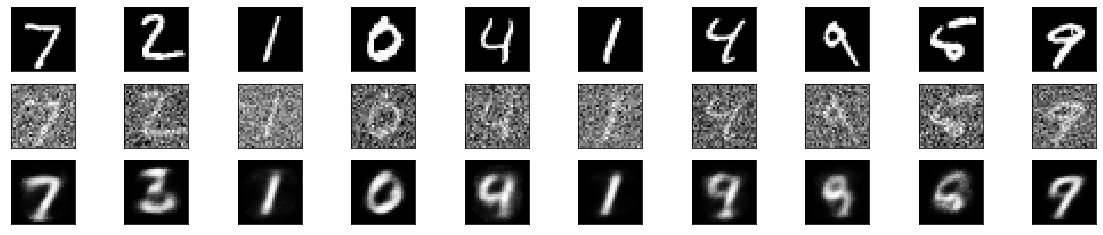

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

tensorboard = TensorBoard(log_dir='2', histogram_freq=0, write_graph=True, write_images=False)
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          callbacks=[tensorboard],
                          validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy data
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()